# 前回のモデル続いて使う

In [1]:
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from transformers import BertJapaneseTokenizer, BertForSequenceClassification

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams["font.family"] = "MS Gothic"

In [3]:
from tqdm import tqdm

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

In [6]:
model = BertForSequenceClassification.from_pretrained('学習済みbertモデル').to(device)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [12]:
tokenizer('この数日嘔吐で食事が取れない時があった', return_tensors='pt', truncation=True, padding=True)

{'input_ids': tensor([[    2,    70,   276,    32, 26632, 30490,    12,  7052,    14, 11646,
            80,    72,    14,   102,    10,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [14]:
tokenizer('この数日嘔吐で食事が取れない時があった')

{'input_ids': [2, 70, 276, 32, 26632, 30490, 12, 7052, 14, 11646, 80, 72, 14, 102, 10, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
tokenizer.tokenize('この数日嘔吐で食事が取れない時があった', return_tensors='pt', truncation=True, padding=True)

Keyword arguments {'return_tensors': 'pt', 'truncation': True, 'padding': True} not recognized.


['この', '数', '日', '嘔', '##吐', 'で', '食事', 'が', '取れ', 'ない', '時', 'が', 'あっ', 'た']

In [21]:
text=['この数日嘔吐で食事が取れない時があった']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
inputs

{'input_ids': tensor([[    2,    70,   276,    32, 26632, 30490,    12,  7052,    14, 11646,
            80,    72,    14,   102,    10,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [20]:
inputs['input_ids'].squeeze(0)

tensor([    2,    70,   276,    32, 26632, 30490,    12,  7052,    14, 11646,
           80,    72,    14,   102,    10,     3])

In [21]:
tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0))

['[CLS]',
 'この',
 '数',
 '日',
 '嘔',
 '##吐',
 'で',
 '食事',
 'が',
 '取れ',
 'ない',
 '時',
 'が',
 'あっ',
 'た',
 '[SEP]']

In [22]:
outputs = model(**inputs,output_attentions=True)

In [23]:
attention_scores=outputs.attentions

In [31]:
len(attention_scores)

12

In [24]:
attention_scores[-1].size()

torch.Size([1, 12, 16, 16])

In [41]:
attention_scores[-1][-1][-1][-1]

tensor([1.2864e-01, 8.6502e-02, 7.7932e-02, 1.4610e-01, 1.1784e-01, 7.4279e-02,
        4.7772e-02, 1.4180e-03, 1.4062e-04, 3.1934e-04, 6.1752e-03, 5.3755e-02,
        4.3325e-02, 4.1161e-02, 6.7695e-02, 1.0695e-01],
       grad_fn=<SelectBackward>)

In [44]:
len(inputs['input_ids'][0])

16

In [42]:
sum(attention_scores[-1][-1][-1][-1])

tensor(1., grad_fn=<AddBackward0>)

In [37]:
m = torch.nn.Softmax(dim=1)
o_args = m(outputs)
o_args_array = o_args.to('cpu').detach().numpy().copy()
preds = o_args_array[:,1].tolist()

In [39]:
o_args

tensor([[5.3140e-05, 9.9995e-01]], grad_fn=<SoftmaxBackward>)

In [41]:
torch.max(o_args, 1)

torch.return_types.max(
values=tensor([0.9999], grad_fn=<MaxBackward0>),
indices=tensor([1]))

In [46]:
a=[1.2864e-01, 8.6502e-02, 7.7932e-02, 1.4610e-01, 1.1784e-01, 7.4279e-02,
        4.7772e-02, 1.4180e-03, 1.4062e-04, 3.1934e-04, 6.1752e-03, 5.3755e-02,
        4.3325e-02, 4.1161e-02, 6.7695e-02, 1.0695e-01]

In [57]:
v=tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0))

In [60]:
df=pd.DataFrame({'attention':v,'word':a})
df

attention      word
0      [CLS]  0.128640
1         この  0.086502
2          数  0.077932
3          日  0.146100
4          嘔  0.117840
5        ##吐  0.074279
6          で  0.047772
7         食事  0.001418
8          が  0.000141
9         取れ  0.000319
10        ない  0.006175
11         時  0.053755
12         が  0.043325
13        あっ  0.041161
14         た  0.067695
15     [SEP]  0.106950

In [72]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams["font.family"] = "MS Gothic"

<AxesSubplot: >

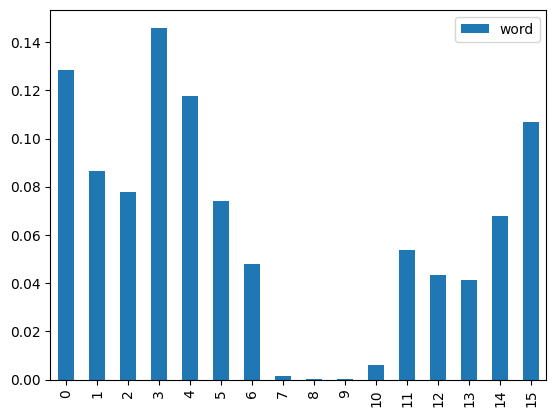

In [62]:
df.plot.bar()


In [44]:
text=['数年前の話なので詳しく覚えていないが肝機能障害、貧血共に回復している。']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
outputs = model(**inputs,output_attentions=True)
attention_scores=outputs.attentions
a=attention_scores[11][-1][-1][-1]
w=tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0))
df=pd.DataFrame({'word':w,'attention':a.tolist()})
df

word  attention
0   [CLS]   0.094146
1       数   0.000142
2       年   0.000318
3       前   0.007289
4       の   0.000245
5       話   0.001128
6       な   0.000079
7      ので   0.000065
8     詳しく   0.000105
9      覚え   0.000083
10      て   0.000031
11      い   0.000065
12     ない   0.000765
13      が   0.026947
14      肝   0.099571
15     機能   0.153728
16     障害   0.109489
17      、   0.052766
18      貧   0.118414
19    ##血   0.081379
20      共   0.054257
21      に   0.008156
22     回復   0.004491
23      し   0.005654
24      て   0.018017
25     いる   0.057374
26      。   0.045684
27  [SEP]   0.059613

<AxesSubplot: xlabel='word'>

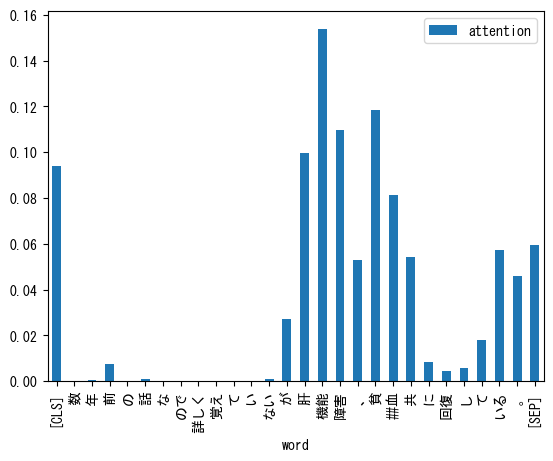

In [49]:
df.plot.bar(x='word',y='attention')

<AxesSubplot: xlabel='word'>

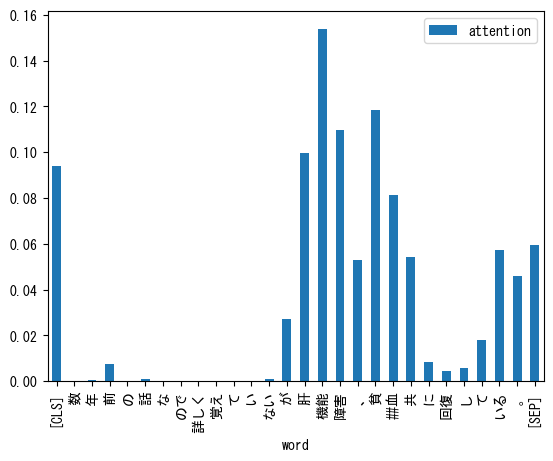

In [56]:
a=attention_scores[11][-1][-1][-1]
w=tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0))
df=pd.DataFrame({'word':w,'attention':a.tolist()})
df.plot.bar(x='word',y='attention')

## attention

In [5]:
text=['数年前の話なので詳しく覚えていないが肝機能障害、貧血共に回復している。','この数日嘔吐で食事が取れない時があった']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
outputs = model(**inputs,output_attentions=True)
attention_scores=outputs.attentions

**出力attentionサイズ**
<br>
**(num_layers,　 batch_size, 　　num_heads,　　　sequence_length,  　　sequence_length)**
<br>
**(   12層,　　　batch_size,　　 12 heads,　　　入力テキストの長さ,　　　入力テキストの長さ)**

**12層**

In [6]:
len(attention_scores)

12

**層ずつのサイズ**
<br>
(batch_size, num_heads, sequence_length, sequence_length)

In [7]:
attention_weight=attention_scores[-1] #最後の層のattention_output
attention_weight.size() #12はhead_num   # 28は入力した各文章の中で一番長い文章の長さ

torch.Size([2, 12, 28, 28])

In [8]:
#一番目のテキスト
frist_txt_attention_scores=attention_scores[-1][0]
frist_txt_attention_scores.size()

torch.Size([12, 28, 28])

**1番目の[CLS］tokenとテキスト中の各文字のattention重み**

In [10]:
from bertviz import head_view

text=['数年前の話なので詳しく覚えていないが肝機能障害、貧血共に回復している。']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
outputs = model(**inputs,output_attentions=True)
attention_scores=outputs.attentions
tokens=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0].squeeze(0))

head_view(attention_scores, tokens)

<IPython.core.display.Javascript object>

![title](img/python.png)


**Attention is all you need**
<br>
https://arxiv.org/pdf/1706.03762.pdf

### attention_weight[index, i, 0, :] 　i->12平均

In [70]:
def attention_weight_singletxt_plot(layer_th,txt):
    text=[txt]
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
    outputs = model(**inputs,output_attentions=True)
    attention_scores=outputs.attentions
    attention_weight=attention_scores[layer_th]
    index=0  #入力した各テキストのindex
    seq_len = attention_weight.size()[2]
    all_attens = torch.zeros(seq_len).to(device)
    for i in range(12):
        all_attens += attention_weight[index, i, 0, :]
    attens=all_attens/12
    w=tokenizer.convert_ids_to_tokens(inputs['input_ids'][index].squeeze(0))
    df=pd.DataFrame({'word':w,'attention':attens.tolist()})
    df.plot.barh(x='word',y='attention').invert_yaxis()
    #return attens.tolist(),w


#### last layer(12rd) attention

In [170]:
attention_weight=attention_scores[-1]
index=0  #入力した各テキストのindex
seq_len = attention_weight.size()[2]
all_attens = torch.zeros(seq_len).to(device)
for i in range(12):
    all_attens += attention_weight[index, i, 0, :] #ここの0は1番目の[CLS］tokenとテキスト中の各文字のattention重み
attens=all_attens/12
attens

tensor([0.0570, 0.0004, 0.0009, 0.0036, 0.0009, 0.0032, 0.0007, 0.0002, 0.0006,
        0.0005, 0.0002, 0.0002, 0.0008, 0.0094, 0.0756, 0.1223, 0.0875, 0.0798,
        0.0934, 0.1385, 0.0938, 0.0396, 0.0152, 0.0145, 0.0162, 0.0250, 0.0834,
        0.0366], grad_fn=<DivBackward0>)

In [171]:
sum(attens)

tensor(1.0000, grad_fn=<AddBackward0>)

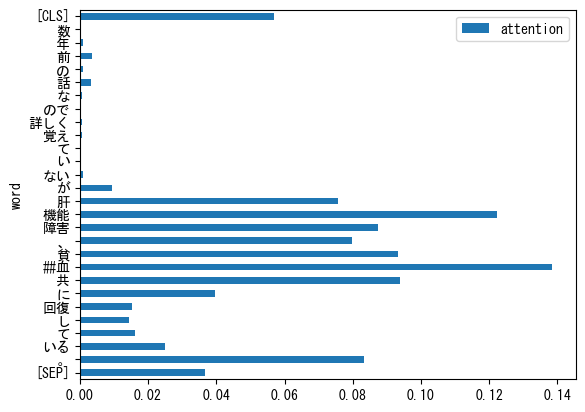

In [112]:
w=tokenizer.convert_ids_to_tokens(inputs['input_ids'][index].squeeze(0))
df=pd.DataFrame({'word':w,'attention':attens.tolist()})
df.plot.barh(x='word',y='attention').invert_yaxis()

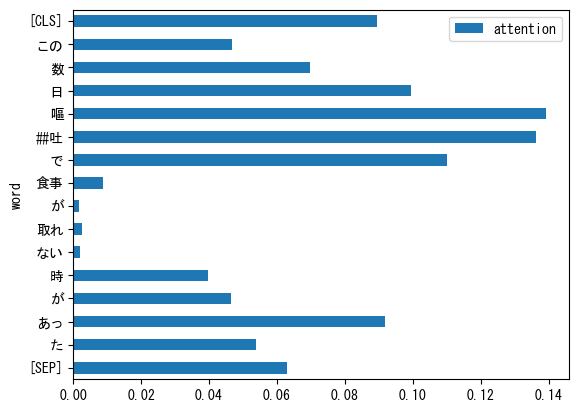

In [113]:
attention_weight_singletxt_plot(11,'この数日嘔吐で食事が取れない時があった')

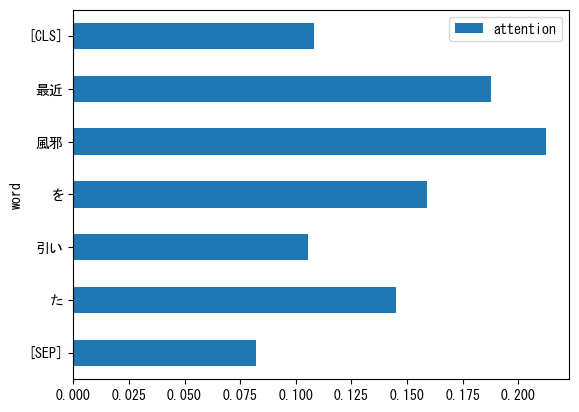

In [114]:
attention_weight_singletxt_plot(11,'最近風邪を引いた')

#### last second(11st) layer

**Q:why last second layer? 最後から2番目の層？
<br>
A:the last layer is too closed to the target functions(i.e. masked language model and next sentence prediction) during pre-traning ,therefore maybe baised to those targets.**

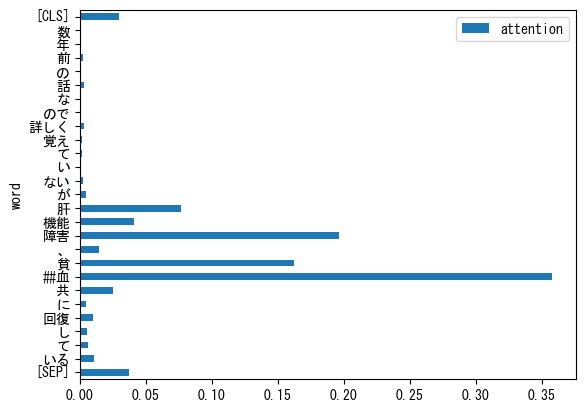

In [115]:
attention_weight_singletxt_plot(-2,'数年前の話なので詳しく覚えていないが肝機能障害、貧血共に回復している')

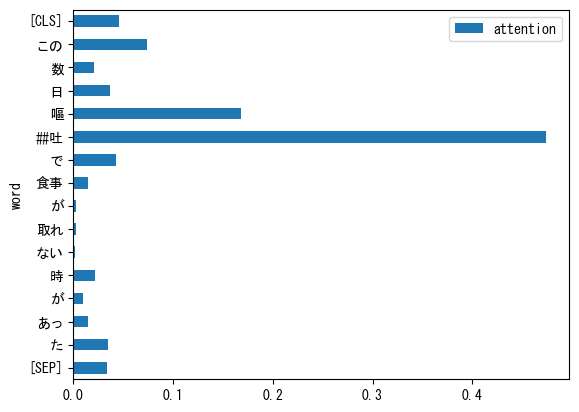

In [116]:
attention_weight_singletxt_plot(-2,'この数日嘔吐で食事が取れない時があった')

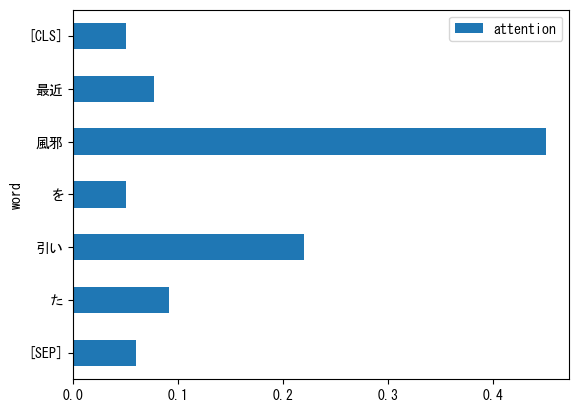

In [117]:
attention_weight_singletxt_plot(-2,'最近風邪を引いた')

## ??

In [122]:
row_pick_word_df[row_pick_word_df['row']=='数年前の話なので詳しく覚えていないが肝機能障害、貧血共に回復している。']

row    pick_word  pick_word_num
5182  数年前の話なので詳しく覚えていないが肝機能障害、貧血共に回復している。  [肝機能障害, 貧血]              2

### テキストは分割すぎ

**肝機能障害==> ['肝', '機能', '障害']　　　正解：肝機能障害**　

In [123]:
text=['肝機能障害']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
tokenizer.convert_ids_to_tokens(inputs['input_ids'][index].squeeze(0))

['[CLS]', '肝', '機能', '障害', '[SEP]']

**間質性肺炎==> ['間','質','性','肺炎']　　　正解：間質性肺炎**

In [124]:
text=['間質性肺炎']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
tokenizer.convert_ids_to_tokens(inputs['input_ids'][index].squeeze(0))

['[CLS]', '間', '質', '性', '肺炎', '[SEP]']

**(白血球減少)発熱性好中球減少==>['(','白血', '##球', '減少', ')', '発熱', '性', '好', '中', '球', '減少']　　　正解：(白血球減少)発熱性好中球減少** 

In [127]:
text=['(白血球減少)発熱性好中球減少']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
tokenizer.convert_ids_to_tokens(inputs['input_ids'][index].squeeze(0))

['[CLS]', '(', '白血', '##球', '減少', ')', '発熱', '性', '好', '中', '球', '減少', '[SEP]']

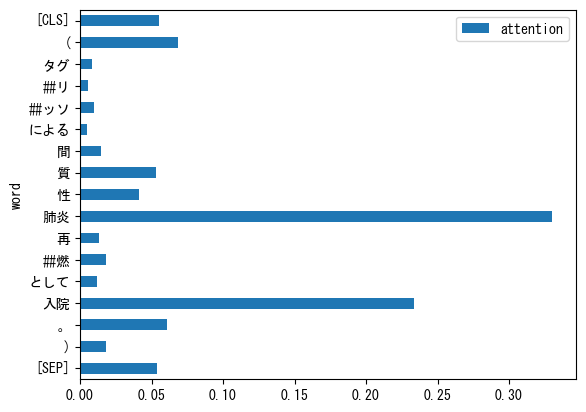

In [118]:
attention_weight_singletxt_plot(-2,'(タグリッソによる間質性肺炎再燃として入院。)')

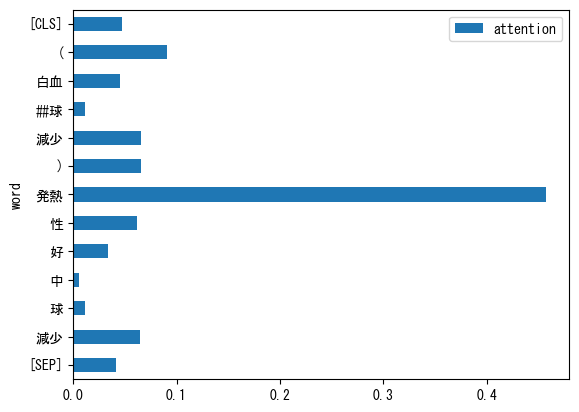

In [119]:
attention_weight_singletxt_plot(-2,'(白血球減少)発熱性好中球減少')

### bertのpre-trainingでのvocabularyの中で単語はありません。

**嘔吐==>['嘔', '##吐']**

In [126]:
text=['嘔吐']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
tokenizer.convert_ids_to_tokens(inputs['input_ids'][index].squeeze(0))

['[CLS]', '嘔', '##吐', '[SEP]']

In [ ]:
['嘔', '吐']

**貧血==> ['貧','##血']**

In [125]:
text=['貧血']
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(device)
tokenizer.convert_ids_to_tokens(inputs['input_ids'][index].squeeze(0))

['[CLS]', '貧', '##血', '[SEP]']

In [ ]:
'(タグリッソによる間質性肺炎再燃として入院。)'